<h2>Import Diabetes dataset using pandas<h2>

In [21]:
import pandas as pd                              #Pandas is used to carry out operations over the dataset
import numpy as np                               #Numpy is used for mathematical computations
import seaborn as sns                            #Seaborn is used for plotting 
data = pd.read_csv("D:\Desktop\diabetes.csv")    #Importing the Diabetes dataset using pandas
data.head(15)                                    #Displays the first 15 rows in the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.corr()     #Used to find the correlation matrix between data-features(columns). If corr is >0.3 then its meaningful

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


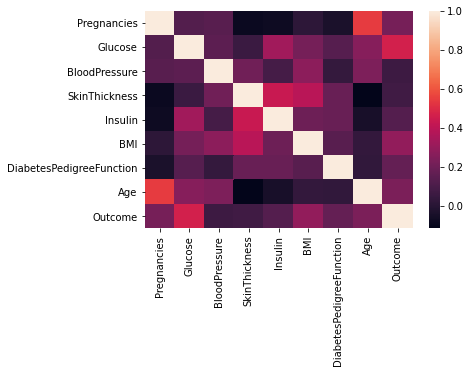

In [23]:
sns.heatmap(data = data.corr())  #Heatmap plot of the Correlation matrix

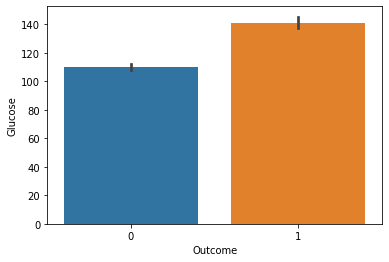

In [25]:
sns.barplot(y = data["Glucose"],x = data["Outcome"])  #Barplot between Glucose and Outcome. Greater the Glucose level greater chance of Diabetes

In [15]:
features = data.drop(["Outcome"],axis = 1) 
target = data["Outcome"]

<h2>Splitting the dataset for Training and Testing<h2>

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size = 0.4,random_state = 40)

In [28]:
for dataset in (y_train,y_test):
    print(round(len(dataset)/len(target),2))  #60% of data for training and 40% for testing 

0.6
0.4


<h1>Logistic Regression Model<h1>

In [29]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\ocac\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred = logmodel.predict(X_test)
print("Accuracy for above dataset: ",(logmodel.score(X_test,y_test))*100,"%")

Accuracy for above dataset:  75.32467532467533 %


<h1>Random Forest Classifier<h1>

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_pred = rf.predict(X_test)
print("Accuracy for above dataset: ",((rf.score(X_test,y_test))*100),"%")

Accuracy for above dataset:  76.2987012987013 %


<h1>K-Nearest Neighbors<h1>

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [36]:
y_pred = knn.predict(X_test)
print("Accuracy for above dataset: ",((knn.score(X_test,y_test))*100),"%")

Accuracy for above dataset:  74.35064935064936 %


<h1>Support Vector Machine<h1>

In [55]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear",C = 0.9,random_state = 20)
svm.fit(X_train,y_train)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=20, shrinking=True, tol=0.001,
    verbose=False)

In [56]:
y_pred = svm.predict(X_test)
print("Accuracy for above dataset: ",((svm.score(X_test,y_test))*100),"%")

Accuracy for above dataset:  76.62337662337663 %


<h1>Naive Bayes<h1>

In [57]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [58]:
y_pred = nb.predict(X_test)
print("Accuracy for above dataset: ",((nb.score(X_test,y_test))*100),"%")

Accuracy for above dataset:  75.64935064935064 %


<h1>Stochastic Gradient Descent<h1>

In [61]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "modified_huber",shuffle = True,random_state = 101)
sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
y_pred = sgd.predict(X_test)
print("Accuracy for above dataset: ",((sgd.score(X_test,y_test))*100),"%")

Accuracy for above dataset:  64.28571428571429 %


<h4>Created by Gourav Ojha<h4>